Labwork 3

1. Kmeans

In [1]:
# 1. Imports & Data Loading
# --------------------------------------------
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt

In [2]:
# Load Iris
iris_df = pd.read_csv(r'D:\MSE\HomeWork\Ky 2\MLE501.9\Test\Lab\Lab 3\Data\Iris.csv')
if 'Id' in iris_df.columns:
    iris_df = iris_df.drop(columns=['Id'])
X_iris = iris_df.drop(columns=['Species']).values
y_iris = iris_df['Species'].values

# Load WineQT
wine_df = pd.read_csv(r'D:\MSE\HomeWork\Ky 2\MLE501.9\Test\Lab\Lab 3\Data\WineQT.csv')
X_wine = wine_df.drop(columns=['quality']).values
y_wine = wine_df['quality'].values

In [3]:
# 2. Preprocessing (Standardization)
# --------------------------------------------
scaler = StandardScaler()
X_iris_sc = scaler.fit_transform(X_iris)
X_wine_sc = scaler.fit_transform(X_wine)

In [4]:
# 3. K-Means with default k
# --------------------------------------------
for name, X, y, default_k in [
    ("Iris", X_iris_sc, y_iris, len(np.unique(y_iris))),
    ("WineQT", X_wine_sc, y_wine, len(np.unique(y_wine))),
]:
    print(f"### {name} – KMeans with k={default_k}")
    km = KMeans(n_clusters=default_k, random_state=42).fit(X)
    labels = km.labels_
    sil = silhouette_score(X, labels)
    ari = adjusted_rand_score(y, labels)
    print(f" Inertia: {km.inertia_:.2f}, Silhouette: {sil:.3f}, ARI: {ari:.3f}\n")

### Iris – KMeans with k=3
 Inertia: 192.04, Silhouette: 0.479, ARI: 0.429

### WineQT – KMeans with k=6
 Inertia: 8142.69, Silhouette: 0.135, ARI: 0.060



c:\Users\binhn\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\binhn\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\binhn\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\binhn\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  

In [6]:
# 4. Vary k & collect metrics
# --------------------------------------------
def evaluate_k_range(X, y, ks):
    sil_scores = []
    ari_scores = []
    inertias = []
    for k in ks:
        km = KMeans(n_clusters=k, random_state=42).fit(X)
        labels = km.labels_
        sil_scores.append(silhouette_score(X, labels))
        ari_scores.append(adjusted_rand_score(y, labels))
        inertias.append(km.inertia_)
    return pd.DataFrame({
        'k': ks,
        'inertia': inertias,
        'silhouette': sil_scores,
        'ARI': ari_scores
    })

ks = list(range(2, 11))
iris_metrics = evaluate_k_range(X_iris_sc, y_iris, ks)
wine_metrics = evaluate_k_range(X_wine_sc, y_wine, ks)

# Display metrics tables
print("Iris clustering metrics:")
display(iris_metrics)

print("WineQT clustering metrics:")
display(wine_metrics)

Iris clustering metrics:


,k,inertia,silhouette,ARI
0,2,223.732006,0.580184,0.568116
1,3,192.037174,0.478724,0.428951
2,4,114.682216,0.387247,0.493292
3,5,91.295445,0.347265,0.437172
4,6,81.760261,0.336223,0.478868
5,7,80.982381,0.268562,0.388810
6,8,68.086239,0.315682,0.380247
7,9,59.385289,0.299142,0.295319
8,10,52.989997,0.321103,0.311790


WineQT clustering metrics:


,k,inertia,silhouette,ARI
0,2,11371.813898,0.194073,0.010186
1,3,10211.695060,0.175812,0.042976
2,4,9217.454146,0.154313,0.065615
3,5,8601.563431,0.151657,0.074477
4,6,8142.691605,0.135224,0.060287
5,7,7220.766756,0.154908,0.059901
6,8,6899.087303,0.156040,0.045293
7,9,6458.982262,0.162624,0.039342
8,10,6341.193204,0.159381,0.038561


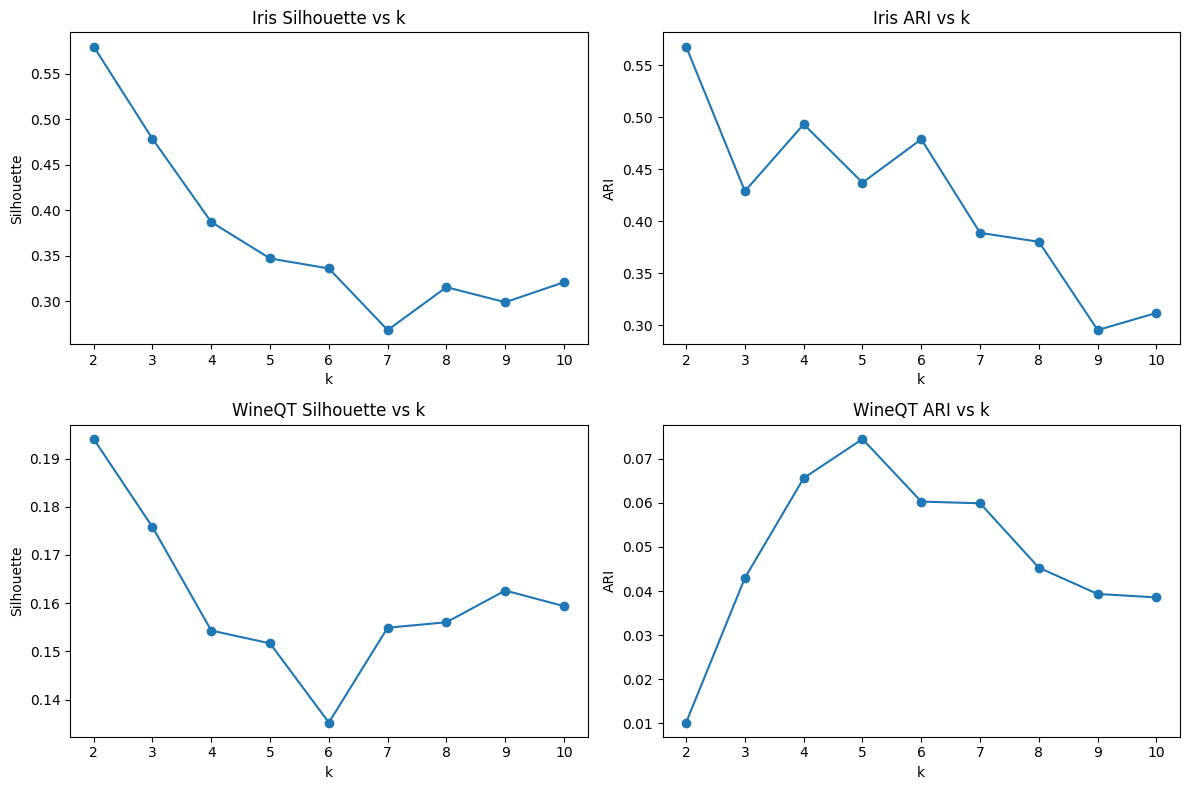

In [7]:
# 5. Plot performance vs k
# --------------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
# Iris
axes[0,0].plot(iris_metrics['k'], iris_metrics['silhouette'], marker='o')
axes[0,0].set_title('Iris Silhouette vs k')
axes[0,0].set_xlabel('k'); axes[0,0].set_ylabel('Silhouette')

axes[0,1].plot(iris_metrics['k'], iris_metrics['ARI'], marker='o')
axes[0,1].set_title('Iris ARI vs k')
axes[0,1].set_xlabel('k'); axes[0,1].set_ylabel('ARI')

# WineQT
axes[1,0].plot(wine_metrics['k'], wine_metrics['silhouette'], marker='o')
axes[1,0].set_title('WineQT Silhouette vs k')
axes[1,0].set_xlabel('k'); axes[1,0].set_ylabel('Silhouette')

axes[1,1].plot(wine_metrics['k'], wine_metrics['ARI'], marker='o')
axes[1,1].set_title('WineQT ARI vs k')
axes[1,1].set_xlabel('k'); axes[1,1].set_ylabel('ARI')

plt.tight_layout()
plt.show()

2. K-means on subspace

In [10]:
!pip install umap-learn


   ---------------------------------------- 0/2 [pynndescent]
   -------------------- ------------------- 1/2 [umap-learn]
   ---------------------------------------- 2/2 [umap-learn]



In [11]:
# 1. Imports, Data Loading & Scaling
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt

# Optional: UMAP (cần `pip install umap-learn`)
try:
    from umap import UMAP
    has_umap = True
except ImportError:
    has_umap = False

# Load Iris
iris = pd.read_csv(r'D:\MSE\HomeWork\Ky 2\MLE501.9\Test\Lab\Lab 3\Data\Iris.csv')
if 'Id' in iris.columns: iris = iris.drop(columns=['Id'])
X_iris = iris.drop(columns=['Species']).values
y_iris = iris['Species'].values

# Load WineQT
wine = pd.read_csv(r'D:\MSE\HomeWork\Ky 2\MLE501.9\Test\Lab\Lab 3\Data\WineQT.csv')
X_wine = wine.drop(columns=['quality']).values
y_wine = wine['quality'].values

# Standardize
scaler = StandardScaler()
X_iris_sc = scaler.fit_transform(X_iris)
X_wine_sc = scaler.fit_transform(X_wine)


In [12]:
# 2. Define Reducers → tất cả đều xuống 2 chiều
reducers = {
    'PCA': PCA(n_components=2, random_state=42),
    'SVD': TruncatedSVD(n_components=2, random_state=42),
    't-SNE': TSNE(n_components=2, random_state=42, init='random')
}
if has_umap:
    reducers['UMAP'] = UMAP(n_components=2, random_state=42)
else:
    print("UMAP chưa cài → bỏ qua UMAP")


In [14]:
!pip install tabulate

In [15]:
# 3. Clustering & Evaluation
results = []
for name, X, y in [('Iris', X_iris_sc, y_iris),
                   ('WineQT', X_wine_sc, y_wine)]:
    true_k = len(np.unique(y))
    
    # → Baseline trên nguyên space
    km = KMeans(n_clusters=true_k, random_state=42).fit(X)
    agg = AgglomerativeClustering(n_clusters=true_k).fit(X)
    results.append((name, 'Original',
                    silhouette_score(X, km.labels_), adjusted_rand_score(y, km.labels_),
                    silhouette_score(X, agg.labels_), adjusted_rand_score(y, agg.labels_)))
    
    # → Trên mỗi subspace reducer
    for method, reducer in reducers.items():
        X_sub = reducer.fit_transform(X)
        km_sub = KMeans(n_clusters=true_k, random_state=42).fit(X_sub)
        agg_sub = AgglomerativeClustering(n_clusters=true_k).fit(X_sub)
        results.append((name, method,
                        silhouette_score(X_sub, km_sub.labels_), adjusted_rand_score(y, km_sub.labels_),
                        silhouette_score(X_sub, agg_sub.labels_), adjusted_rand_score(y, agg_sub.labels_)))

# Hiển thị bảng so sánh
df_res = pd.DataFrame(results, columns=[
    'Dataset','Space','KMeans Silhouette','KMeans ARI',
    'AHC Silhouette','AHC ARI'
])
print(df_res.to_markdown(index=False))


| Dataset   | Space    |   KMeans Silhouette |   KMeans ARI |   AHC Silhouette |   AHC ARI |
|:----------|:---------|--------------------:|-------------:|-----------------:|----------:|
| Iris      | Original |            0.478724 |    0.428951  |         0.44554  | 0.615323  |
| Iris      | PCA      |            0.522132 |    0.428951  |         0.510294 | 0.586073  |
| Iris      | SVD      |            0.522132 |    0.428951  |         0.510294 | 0.586073  |
| Iris      | t-SNE    |            0.647164 |    0.601129  |         0.616544 | 0.642988  |
| Iris      | UMAP     |            0.777657 |    0.449873  |         0.622232 | 0.704798  |
| WineQT    | Original |            0.135224 |    0.0602866 |         0.131992 | 0.0633806 |
| WineQT    | PCA      |            0.326183 |    0.053233  |         0.277897 | 0.0355263 |
| WineQT    | SVD      |            0.326183 |    0.053233  |         0.277897 | 0.0355263 |
| WineQT    | t-SNE    |            0.427221 |    0.0483534 |         

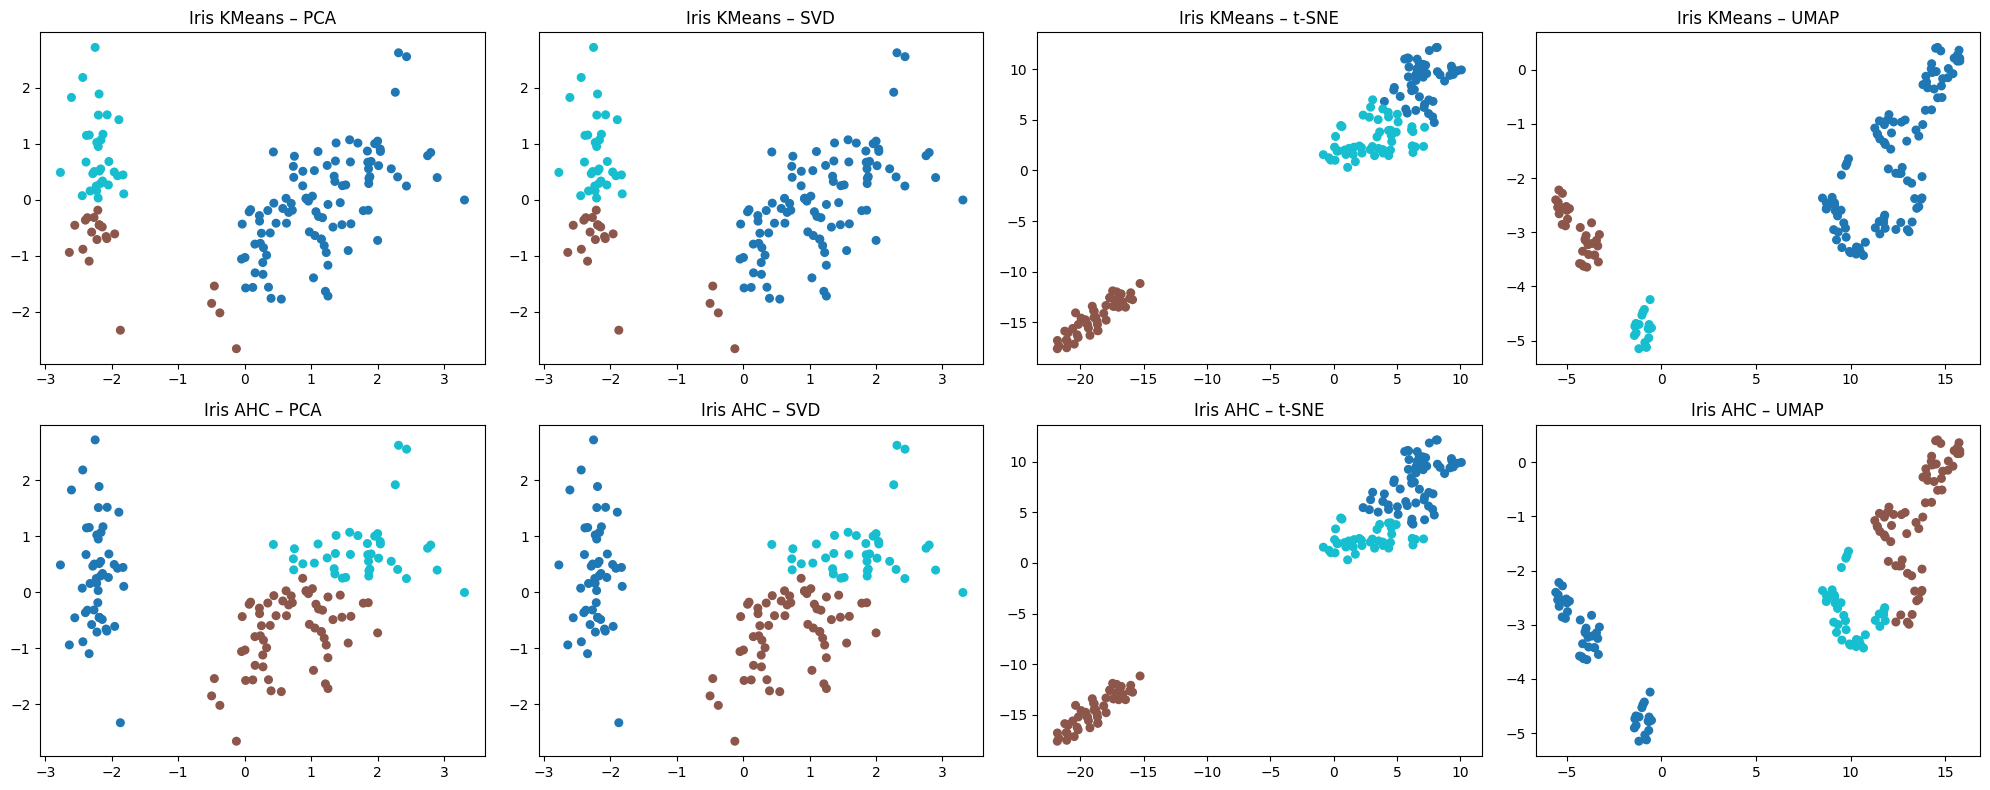

In [16]:
# 4. Visualize clusters in 2D (lấy ví dụ Iris)
n_methods = len(reducers)
fig, axes = plt.subplots(2, n_methods, figsize=(5*n_methods, 8))

for idx, (method, reducer) in enumerate(reducers.items()):
    X2 = reducer.fit_transform(X_iris_sc)
    # K-Means
    km = KMeans(n_clusters=3, random_state=42).fit(X2)
    axes[0, idx].scatter(X2[:,0], X2[:,1], c=km.labels_, cmap='tab10', s=30)
    axes[0, idx].set_title(f'Iris KMeans – {method}')
    # AHC
    agg = AgglomerativeClustering(n_clusters=3).fit(X2)
    axes[1, idx].scatter(X2[:,0], X2[:,1], c=agg.labels_, cmap='tab10', s=30)
    axes[1, idx].set_title(f'Iris AHC – {method}')

plt.tight_layout()
plt.show()


3. Repeat above questions with one of the clustering for the two selected datasets: DBSCAN, SOM, or

In [19]:

# 1. Imports & Data Loading
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt

# Load & prepare Iris
iris = pd.read_csv(r'D:\MSE\HomeWork\Ky 2\MLE501.9\Test\Lab\Lab 3\Data\Iris.csv')
if 'Id' in iris.columns: iris = iris.drop(columns=['Id'])
X_iris = iris.drop(columns=['Species']).values
y_iris = iris['Species'].values

# Load & prepare WineQT
wine = pd.read_csv(r'D:\MSE\HomeWork\Ky 2\MLE501.9\Test\Lab\Lab 3\Data\WineQT.csv')
X_wine = wine.drop(columns=['quality']).values
y_wine = wine['quality'].values

# Standardize both datasets
scaler = StandardScaler()
X_iris_sc = scaler.fit_transform(X_iris)
X_wine_sc = scaler.fit_transform(X_wine)


In [20]:
# 2. DBSCAN with default hyperparameters
print("### Iris – DBSCAN (eps=0.5, min_samples=5)")
db_iris = DBSCAN(eps=0.5, min_samples=5).fit(X_iris_sc)
labels_iris = db_iris.labels_
# Some points may be labeled -1 (noise); silhouette_score requires >1 cluster
n_clusters = len(set(labels_iris)) - (1 if -1 in labels_iris else 0)
if n_clusters > 1:
    sil_iris = silhouette_score(X_iris_sc, labels_iris)
else:
    sil_iris = np.nan
ari_iris = adjusted_rand_score(y_iris, labels_iris)
print(f"Clusters: {n_clusters}, Silhouette: {sil_iris:.3f}, ARI: {ari_iris:.3f}\n")

print("### WineQT – DBSCAN (eps=0.5, min_samples=5)")
db_wine = DBSCAN(eps=0.5, min_samples=5).fit(X_wine_sc)
labels_wine = db_wine.labels_
n_clusters_w = len(set(labels_wine)) - (1 if -1 in labels_wine else 0)
if n_clusters_w > 1:
    sil_wine = silhouette_score(X_wine_sc, labels_wine)
else:
    sil_wine = np.nan
ari_wine = adjusted_rand_score(y_wine, labels_wine)
print(f"Clusters: {n_clusters_w}, Silhouette: {sil_wine:.3f}, ARI: {ari_wine:.3f}")


### Iris – DBSCAN (eps=0.5, min_samples=5)
Clusters: 2, Silhouette: 0.349, ARI: 0.428

### WineQT – DBSCAN (eps=0.5, min_samples=5)
Clusters: 1, Silhouette: nan, ARI: -0.002


In [21]:
# 3. Vary eps & min_samples, collect metrics
eps_values = [0.2, 0.5, 0.8, 1.0]
min_samples_values = [3, 5, 7]
records = []

for dataset, X, y in [('Iris', X_iris_sc, y_iris), ('WineQT', X_wine_sc, y_wine)]:
    for eps in eps_values:
        for ms in min_samples_values:
            db = DBSCAN(eps=eps, min_samples=ms).fit(X)
            lbl = db.labels_
            n_cl = len(set(lbl)) - (1 if -1 in lbl else 0)
            sil = silhouette_score(X, lbl) if n_cl > 1 else np.nan
            ari = adjusted_rand_score(y, lbl)
            records.append((dataset, eps, ms, n_cl, sil, ari))

metrics_df = pd.DataFrame(records, columns=[
    'Dataset','eps','min_samples','n_clusters','Silhouette','ARI'
])
print("DBSCAN Hyperparameter Tuning Results:")
display(metrics_df)


DBSCAN Hyperparameter Tuning Results:


,Dataset,eps,min_samples,n_clusters,Silhouette,ARI
0,Iris,0.2,3,5,0.104502,0.035767
1,Iris,0.2,5,0,NaN,0.000000
2,Iris,0.2,7,0,NaN,0.000000
3,Iris,0.5,3,7,0.149783,0.441263
4,Iris,0.5,5,2,0.349198,0.428263
5,Iris,0.5,7,5,0.126960,0.452292
6,Iris,0.8,3,2,0.520597,0.551755
7,Iris,0.8,5,2,0.520597,0.551755
8,Iris,0.8,7,2,0.521564,0.535966
9,Iris,1.0,3,2,0.502877,0.558371


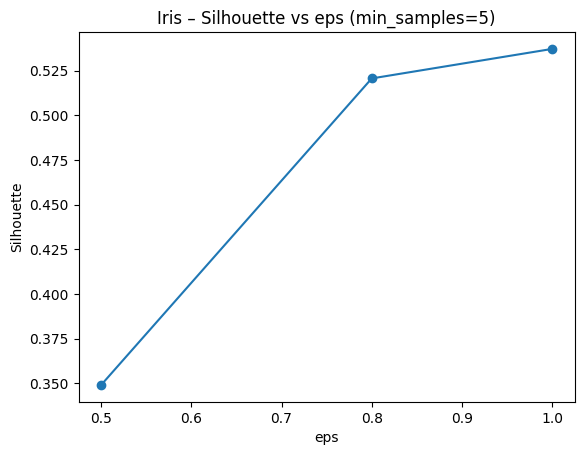

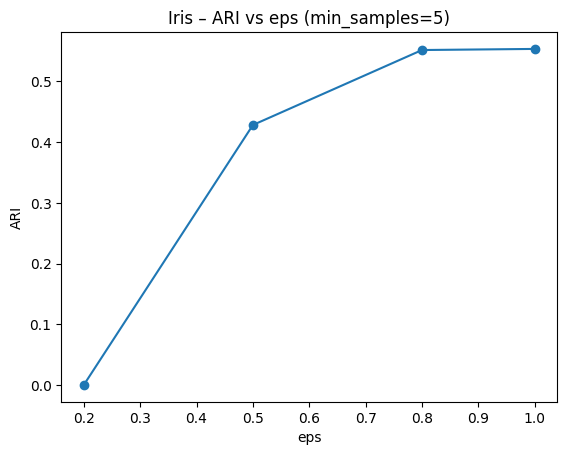

In [22]:
# 4. Plot Silhouette vs eps for fixed min_samples=5 (for Iris)
ir_df = metrics_df[(metrics_df.Dataset=='Iris') & (metrics_df.min_samples==5)]
plt.figure()
plt.plot(ir_df.eps, ir_df.Silhouette, marker='o')
plt.title('Iris – Silhouette vs eps (min_samples=5)')
plt.xlabel('eps'); plt.ylabel('Silhouette')
plt.show()

# Plot ARI vs eps
plt.figure()
plt.plot(ir_df.eps, ir_df.ARI, marker='o')
plt.title('Iris – ARI vs eps (min_samples=5)')
plt.xlabel('eps'); plt.ylabel('ARI')
plt.show()


In [23]:
# 6. Comments on Performance Changes
print("""
- Khi eps tăng, DBSCAN gom cluster to hơn, giảm số noise.
- Silhouette score thường tăng đến ngưỡng rồi giảm khi clusters quá to.
- ARI thể hiện độ khớp với nhãn gốc; DBSCAN chưa chắc khớp tốt vì không supervision.
- Thay đổi min_samples ảnh hưởng sensitivity: min_samples lớn → ít cluster, nhiều noise.
""")



- Khi eps tăng, DBSCAN gom cluster to hơn, giảm số noise.
- Silhouette score thường tăng đến ngưỡng rồi giảm khi clusters quá to.
- ARI thể hiện độ khớp với nhãn gốc; DBSCAN chưa chắc khớp tốt vì không supervision.
- Thay đổi min_samples ảnh hưởng sensitivity: min_samples lớn → ít cluster, nhiều noise.

